In [1]:
import os 
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

2024-04-25 11:47:14.260507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 11:47:15.231734: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('./data/train/train.csv')
df.shape

(304, 2)

In [3]:
labels_dict={"Pikachu":0,"Bulbasaur":1,"Charmander":2 }
label2pokemon = {0:"Pikachu",1:"Bulbasaur",2:"Charmander"}


# Initialize lists to store images and labels
image_data = []
labels = []
label = df['NameOfPokemon']
p = Path("/workspaces/Machine_Learning_in_Python/Projects/Pokemon Classification/data/train/Images")
j = 0
for filename in df['ImageId']:
    label = str(df['NameOfPokemon'][j]) 
    j=j+1
    img_path = p / filename  # Construct full path to the image
    img = image.load_img(img_path,target_size=(100,100))  # Load the image
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(labels_dict[label])
    


/home/codespace/.local/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
# labels1=[]
# j=0
# labels_dict={"Pikachu":0,"Bulbasaur":1,"Charmander":2 }

# for i in range(1,303): 
#     label = str(df['NameOfPokemon'][j])
#     labels1.append(labels_dict[label])
#     j=j+1

# labels = np.array(labels1)
# print(np.unique(labels1))

In [5]:
X = np.array(image_data)
Y = np.array(labels)

from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

#Normalisation
X = X/255.0


print(X.shape,Y.shape)

(304, 100, 100, 3) (304,)


In [6]:
X

array([[[[1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        [[0.99607843, 0.98039216, 0.96862745],
         [0.99215686, 0.9764706 , 0.972549  ],
         [1.        , 0.9843137 , 0.972549  ],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        [[1.        , 0.98039216, 0.9647059 ],
         [1.        , 0.972549  , 0.9647059 ],
         [1.        , 0.98039216, 0.96862745],
         ...,
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745],
         [1.        , 0.98039216, 0.96862745]],

        ...,

        [[0.99215686, 0.91764706, 0.8901961 ],
         [0.99215686, 0.91764706, 0.8901961 ]

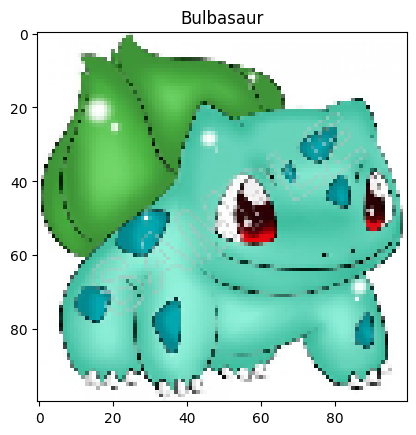

In [7]:
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.show()
drawImg(X[150],Y[150])

In [8]:
# Creating Training and Test Data
split = int(X.shape[0]*.8)

X_ = np.array(X)
Y_ = np.array(Y)

# Training Set
X = X_[:split,:]
Y = Y_[:split]

#Test Set
XTest = X_[split:,:]
YTest = Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(243, 100, 100, 3) (243,)
(61, 100, 100, 3) (61,)


In [9]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans   
    

In [10]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht
    

In [11]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [12]:
model = NeuralNetwork(input_size=30000,layers=[150,75],output_size=3) # 30000 features

In [13]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(243, 30000)
(61, 30000)


In [14]:
l = train(X,Y,model,300,0.0002)

Epoch 0 Loss 2.9339
Epoch 1 Loss 2.2983
Epoch 2 Loss 1.9443
Epoch 3 Loss 1.7980
Epoch 4 Loss 1.7012
Epoch 5 Loss 1.5145
Epoch 6 Loss 1.5371
Epoch 7 Loss 1.3247
Epoch 8 Loss 1.2942
Epoch 9 Loss 1.3093
Epoch 10 Loss 1.2637
Epoch 11 Loss 1.0703
Epoch 12 Loss 0.9289
Epoch 13 Loss 0.9609
Epoch 14 Loss 0.9376
Epoch 15 Loss 0.9448
Epoch 16 Loss 0.8261
Epoch 17 Loss 0.8106
Epoch 18 Loss 0.7756
Epoch 19 Loss 0.8378
Epoch 20 Loss 0.7300
Epoch 21 Loss 0.7275
Epoch 22 Loss 0.6654
Epoch 23 Loss 0.6207
Epoch 24 Loss 0.5788
Epoch 25 Loss 0.5852
Epoch 26 Loss 0.6107
Epoch 27 Loss 0.5513
Epoch 28 Loss 0.5155
Epoch 29 Loss 0.5172
Epoch 30 Loss 0.5174
Epoch 31 Loss 0.5201
Epoch 32 Loss 0.4803
Epoch 33 Loss 0.4846
Epoch 34 Loss 0.4464
Epoch 35 Loss 0.4451
Epoch 36 Loss 0.4645
Epoch 37 Loss 0.4116
Epoch 38 Loss 0.3924
Epoch 39 Loss 0.4511
Epoch 40 Loss 0.3868
Epoch 41 Loss 0.3909
Epoch 42 Loss 0.3989
Epoch 43 Loss 0.4782
Epoch 44 Loss 0.4593
Epoch 45 Loss 0.4126
Epoch 46 Loss 0.3997
Epoch 47 Loss 0.4027
Ep

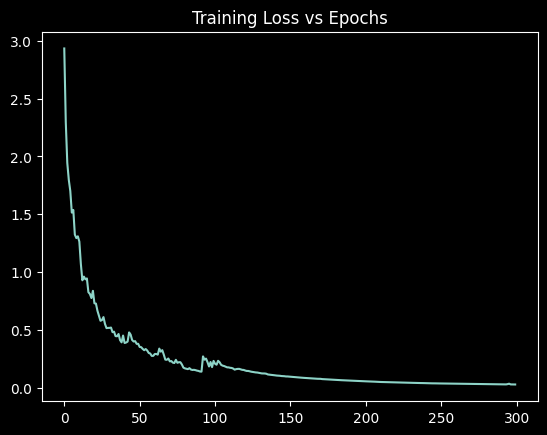

In [15]:
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [16]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9835
Test Acc 0.7049


Pridiction 0 Charmander


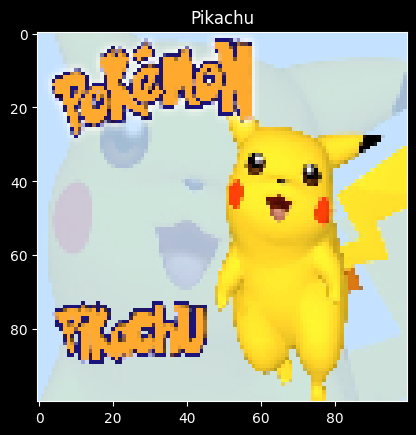

Pridiction 1 Charmander


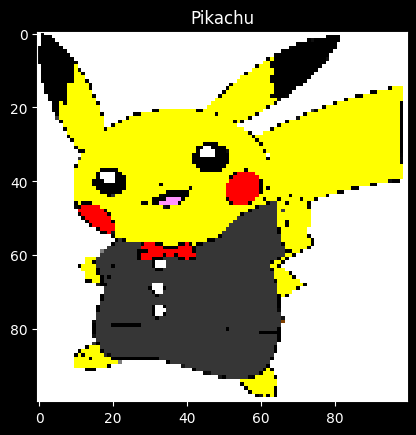

Pridiction 8 Charmander


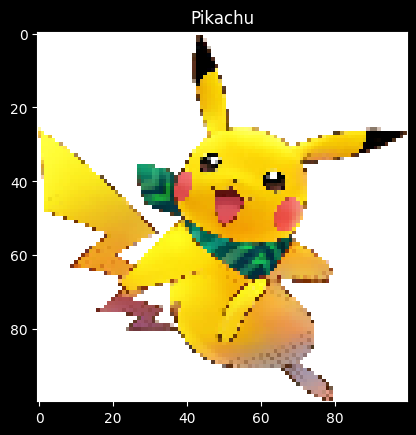

Pridiction 9 Pikachu


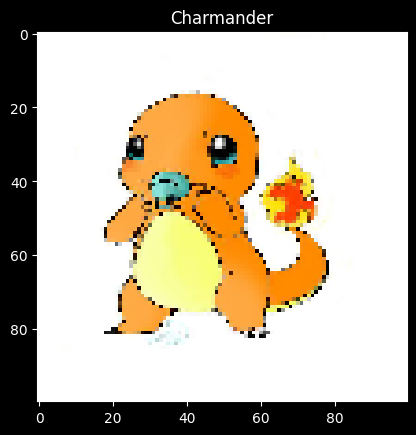

Pridiction 11 Charmander


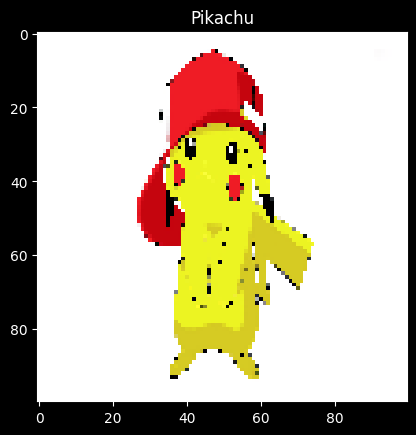

Pridiction 14 Charmander


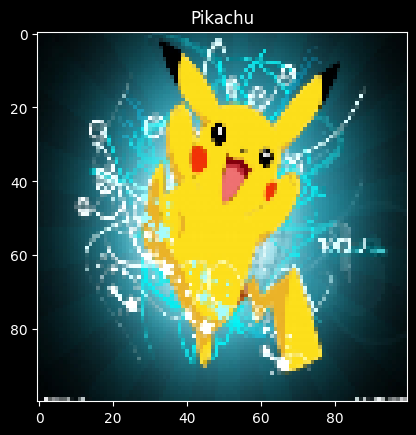

Pridiction 24 Bulbasaur


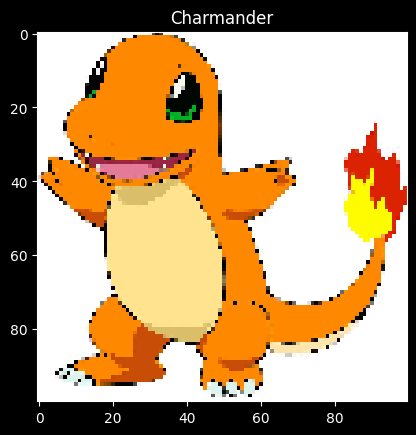

Pridiction 30 Charmander


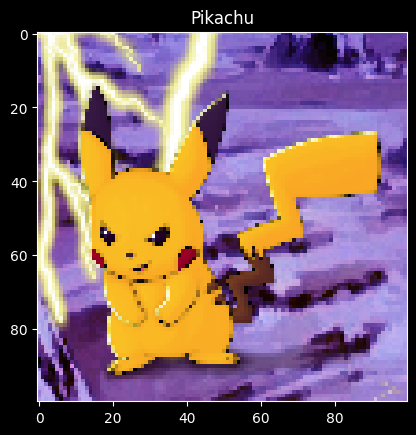

Pridiction 32 Pikachu


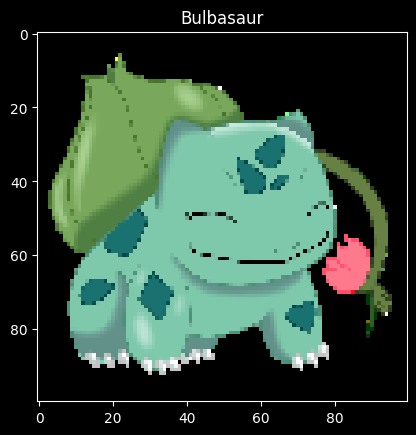

Pridiction 33 Pikachu


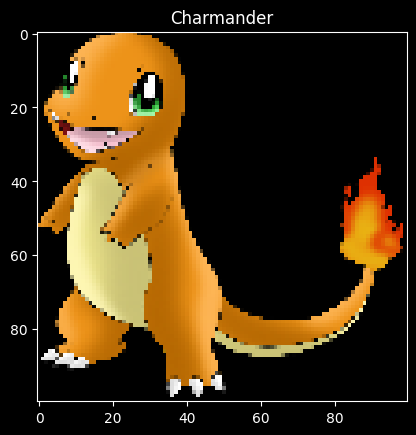

Pridiction 42 Pikachu


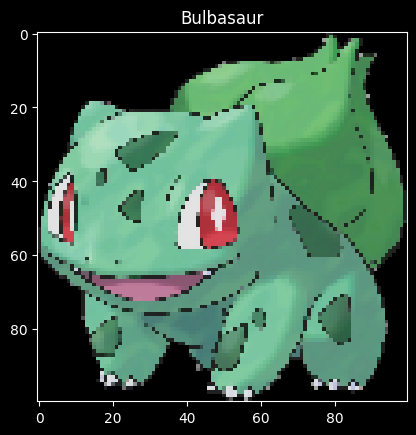

Pridiction 45 Charmander


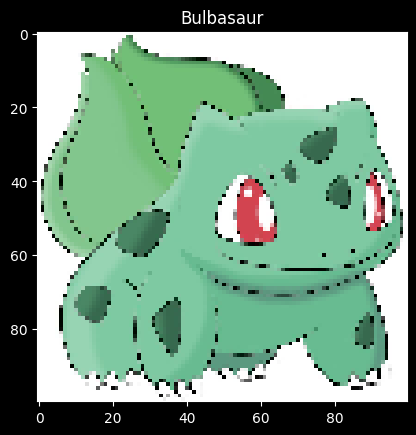

Pridiction 46 Charmander


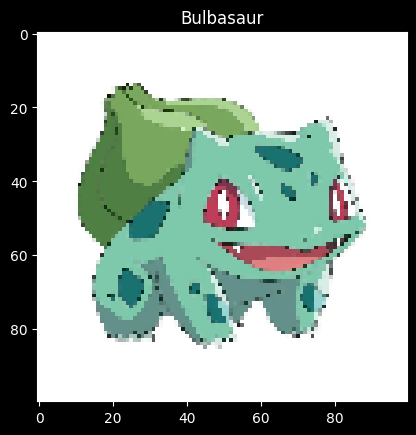

Pridiction 48 Bulbasaur


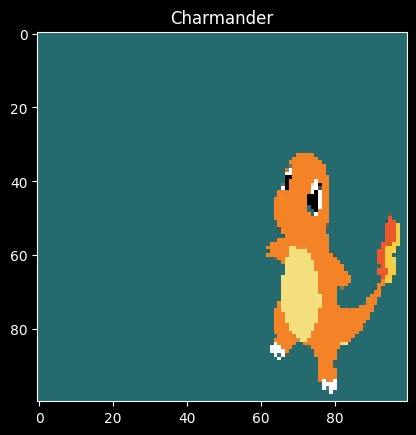

Pridiction 51 Bulbasaur


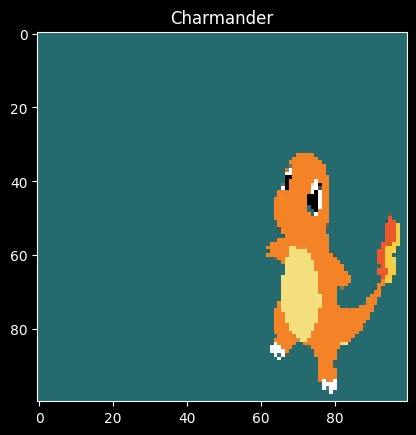

Pridiction 55 Bulbasaur


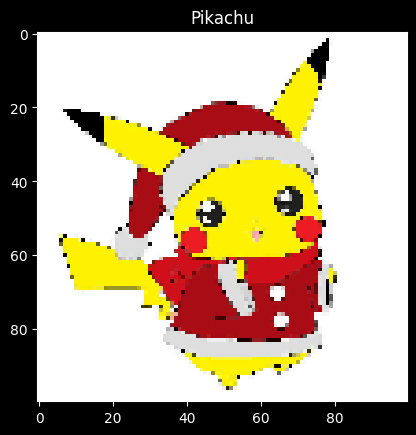

Pridiction 57 Bulbasaur


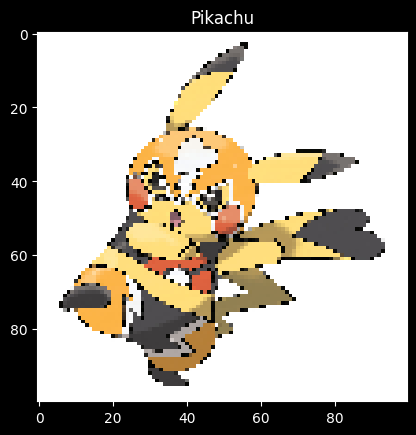

Pridiction 59 Charmander


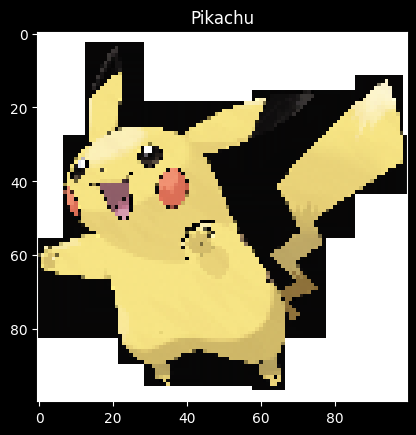

In [17]:
outputs = model.predict(XTest)
for i in range(YTest.shape[0]):
    if YTest[i] != outputs[i]:
        print("Pridiction %d %s"%(i,label2pokemon[outputs[i]]))
        drawImg(XTest[i].reshape(100,100,3),YTest[i])
        